# 第8章　数値シミュレーションで消費者の行動を予測する

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df_links = pd.read_csv('Data100/8_data/links.csv')
df_links.head()

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
0,Node0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Node2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Node4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
df_links.shape

(20, 21)

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


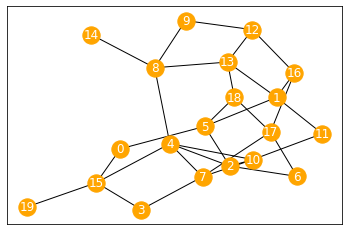

In [12]:
# -- 口コミの伝染ネットワーク --
import networkx as nx

G = nx.Graph()

NUM = len(df_links.index)
for i in range(1, NUM+1):
    node_no = df_links.columns[i].strip("Node")
    G.add_node(str(node_no))

for i in range(NUM):
    for j in range(NUM):
        node_name = 'Node' + str(j)
        if df_links[node_name].iloc[i] == 1:
            G.add_edge(str(i), str(j))
            
nx.draw_networkx(G, node_color='orange', edge_color='k', font_color='w')
plt.show()
    

In [13]:
node_name

'Node19'

## 口コミの情報電番を可視化

In [18]:
def determine_link(percent):
    rand_val = np.random.rand()
    if rand_val<=percent:
        return 1
    else:
        return 0

In [52]:
def simulate_percolation(num, list_active, percent_percolation):
    for i in range(num):
        if list_active[i]==1:
            for j in range(num):
                node_name = "Node" + str(j)
                if df_links[node_name].iloc[i]==1:
                    if determine_link(percent_percolation)==1:
                        list_active[j] = 1
    return list_active

In [53]:
percent_percolation=0.1
T_NUM=100
NUM=len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1

In [54]:
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_percolation(NUM, list_active, percent_percolation)
    list_timeSeries.append(list_active.copy())

In [55]:
list_timeSeries[:4]

[array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.])]

In [56]:
# アクティブノード可視化 #
def active_node_coloring(list_active):
    #print(list_timeSeries[t])
    list_color = []
    for i in range(len(list_timeSeries[t])):
        if list_timeSeries[t][i]==1:
            list_color.append("r")
        else:
            list_color.append("k")
    #print(len(list_color))
    return list_color

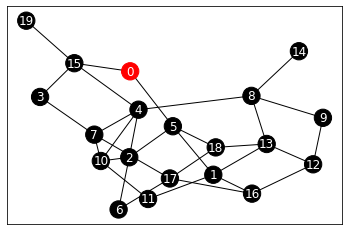

In [57]:
# 描画
t = 0
nx.draw_networkx(G,font_color="w",node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

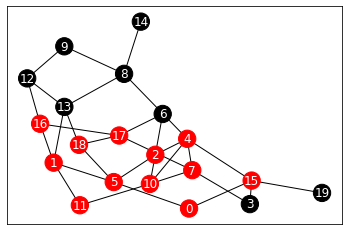

In [58]:
# 描画
t = 11
nx.draw_networkx(G,font_color="w",node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

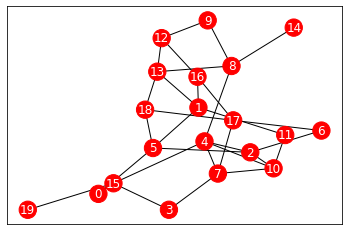

In [59]:
# 描画
t = 99
nx.draw_networkx(G,font_color="w",node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

# 口コミの時系列変化をグラフか

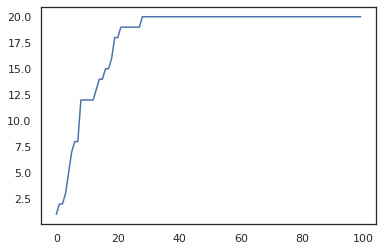

In [61]:
sns.set()
sns.set_style('white')

list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))
    
plt.plot(list_timeSeries_num)
plt.show()

# 会員数の時系列変化をシミュレーション

In [16]:
def simulate_population(num, list_active, percent_percolation, percent_disapparence, df_links):
    # -- 拡散 --
    for i in range(num):
        if list_active[i]==1:
            for j in range(num):
                if df_links.iloc[i,j]==1:
                    if determine_link(percent_percolation)==1:
                        list_active[j] = 1
                        
    # -- 消滅 --
    for i in range(num):
        if determine_link(percent_disapparence)==1:
            list_active[i]=0
    return list_active

In [156]:
def determine_link(percent):
    rand_val = np.random.rand()
    if rand_val<=percent:
        return 1
    else:
        return 0

In [157]:
# 0~1までのランダムな数字を返す
np.random.rand()

0.9931638101011521

In [158]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [159]:
'''
拡散： 15 %
消滅： 4 %
-----------
期間： 100ヶ月
'''
percent_percolation = 0.15
percent_dissaparence = 0.04
T_NUM=100
NUM = len(df_links)
list_active = np.zeros(len(df_links))
list_active[0] = 1


In [160]:
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_dissaparence, df_links)
    list_timeSeries.append(list_active.copy())

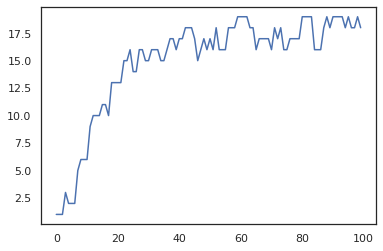

In [161]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

In [163]:
list_timeSeries[99]

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [128]:
np.linspace(0,1,num=21)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [135]:
a = np.eye(3)
a[2,2]

1.0

In [ ]:
from tqdm import tqdm

In [170]:
# 相図計算
print("相図計算開始")
T_NUM = 100
NUM_PhaseDiagram = 20
phaseDiagram = np.zeros((NUM_PhaseDiagram,NUM_PhaseDiagram))
for i_p in range(NUM_PhaseDiagram):
    for i_d in range(NUM_PhaseDiagram):
        percent_percolation = 0.05*i_p
        percent_disapparence = 0.05*i_d
        list_active = np.zeros(NUM)
        list_active[0] = 1
        for t in range(T_NUM):
            list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_links)
        phaseDiagram[i_p][i_d] = sum(list_active)
print(phaseDiagram)

相図計算開始
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20.  0. 17.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 15. 13. 11.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 17. 18. 12. 12.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20.  0. 18. 16.  8.  0.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 18. 18. 13. 12.  0.  0. 11.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 19. 17. 17.  0.  0.  0. 15.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 19. 14. 16. 10. 12. 12. 11. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 16. 11.  0. 12.  0. 11. 10.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 19. 18. 18.  0. 11. 12. 12. 10.  0. 10.  3.  0.  0. 

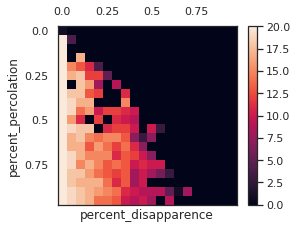

In [171]:
# 表示
plt.matshow(phaseDiagram)
plt.colorbar(shrink=0.8)
plt.xlabel('percent_disapparence')
plt.ylabel('percent_percolation')
plt.xticks(np.arange(0.0, 20.0,5), np.arange(0.0, 1.0, 0.25))
plt.yticks(np.arange(0.0, 20.0,5), np.arange(0.0, 1.0, 0.25))
plt.tick_params(bottom=False,
                left=False,
                right=False,
                top=False)
plt.show()

In [3]:
df_mem_links = pd.read_csv('Data100/8_data/links_members.csv')
df_mem_info = pd.read_csv('Data100/8_data/info_members.csv')

In [4]:
df_mem_links.head()

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node530,Node531,Node532,Node533,Node534,Node535,Node536,Node537,Node538,Node539
0,Node0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Node2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Node4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [5]:
df_mem_info.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,Node0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Node2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,Node3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,Node4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [6]:
df_mem_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Columns: 541 entries, Unnamed: 0 to Node539
dtypes: float64(540), object(1)
memory usage: 2.2+ MB


In [7]:
link_array = []
for i in range(540):
    link_array.append(sum(df_mem_links.drop('Unnamed: 0', axis=1).iloc[i,:]))

    

In [8]:
link_array[:3]

[32.0, 128.0, 155.0]

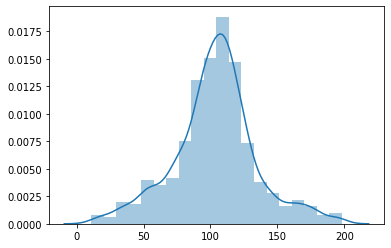

In [9]:
sns.distplot(link_array, bins=20)

In [10]:
NUM = len(df_mem_info.index)
T_NUM = len(df_mem_info.columns)-1

# -- 消滅確率の推定 --
'''
1から0に変わっているやつ(count_active)が多いほど消滅確率が高い！
'''
count_active = 0
count_active_to_inactive = 0
for t in range(1,T_NUM):
    for i in range(NUM):
        if (df_mem_info.iloc[i,t]==1):
            count_active_to_inactive += 1
            if (df_mem_info.iloc[i, t+1]==0):
                count_active += 1
                
estimated_percent_disapparence = count_active/count_active_to_inactive
estimated_percent_disapparence

0.10147163541419416

In [12]:
# -- 拡散確率の推定 --
from tqdm import tqdm

count_link = 0
count_link_to_active = 0
count_link_temp = 0

for t in tqdm(range(T_NUM-1)):
    df_link_t = df_mem_info[df_mem_info[str(t)]==1]
    temp_flag_count = np.zeros(NUM)
    for i in range(len(df_link_t.index)):
        df_link_temp = df_mem_links[df_mem_links["Node"+str(df_link_t.index[i])]==1]
        for j in range(len(df_link_temp.index)):
            if (df_mem_info.iloc[df_link_temp.index[j]][t]==0):
                if (temp_flag_count[df_link_temp.index[j]]==0):
                    count_link += 1
                if (df_mem_info.iloc[df_link_temp.index[j]][t+1]==1):
                    if (temp_flag_count[df_link_temp.index[j]]==0):
                        temp_flag_count[df_link_temp.index[j]] = 1 
                        count_link_to_active += 1
estimated_percent_percolation = count_link_to_active/count_link

100%|██████████| 23/23 [03:20<00:00,  8.71s/it]


In [13]:
estimated_percent_percolation

0.025184661323275185

# Simulation

In [19]:
percent_percolation = estimated_percent_percolation
percent_disapparence = estimated_percent_disapparence

T_NUM = 24
NUM = len(df_mem_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_mem_links)
    list_timeSeries.append(list_active.copy())

In [20]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

In [21]:
T_NUM = len(df_mem_info.columns)-1
list_timeSeries_num_real = []
for t in range(0,T_NUM):
    list_timeSeries_num_real.append(len(df_mem_info[df_mem_info[str(t)]==1].index))

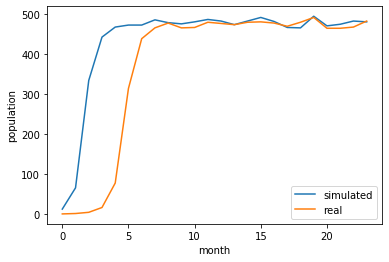

In [22]:
plt.plot(list_timeSeries_num, label = 'simulated')
plt.plot(list_timeSeries_num_real, label = 'real')
plt.xlabel('month')
plt.ylabel('population')
plt.legend(loc='lower right')
plt.show()

In [ ]:
T_NUM = 36
NUM = len(df_mem_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_mem_links)
    list_timeSeries.append(list_active.copy())

In [ ]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

In [ ]:
plt.plot(list_timeSeries_num, label = 'simulated')
plt.xlabel('month')
plt.ylabel('population')
plt.legend(loc='lower right')
plt.show()